In [7]:
import pandas as pd
import numpy as np

import chardet

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import glob
import os

En este archivo se hara el Analisis Exploratorio de los Datos de las siguientes tablas:

- D_CPT: Diccionario de alto nivel de los códigos CPT
- D_ICD_DIAGNOSES: Diccionario de los diagnósticos según el ICD
- D_ICD_PROCEDURES: Diccionario de procedimientos según el ICD
- D_ITEMS: Diccionario de ITEMIDS, excepto las relativas a pruebas de laboratorio
- D_LABITEMS: Diccionario de ITEMIDs relacionado a las pruebas de laboratorio
- TRANSFERS: Traslado de pacientes de una cama a otra dentro del hospital
- PATIENTS: Cada uno de los pacientes
- PRESCRIPTIONS: Órdenes de medicamentos, no siempre administradas, para un paciente
- SERVICES: El servicio bajo el cual los pacientes están inscriptos





## EDA

#### Tabla D_CPT


In [9]:
df = pd.read_csv('Data/dataset/D_CPT.csv', encoding = 'ascii')

# Visualizamos los primeros 5 registros.
df.head()

,row_id,category,sectionrange,sectionheader,subsectionrange,subsectionheader,codesuffix,mincodeinsubsection,maxcodeinsubsection
0,1,1,99201-99499,Evaluation and management,99201-99216,Office/other outpatient services,NaN,99201,99216
1,2,1,99201-99499,Evaluation and management,99217-99220,Hospital observation services,NaN,99217,99220
2,3,1,99201-99499,Evaluation and management,99221-99239,Hospital inpatient services,NaN,99221,99239
3,4,1,99201-99499,Evaluation and management,99241-99255,Consultations,NaN,99241,99255
4,5,1,99201-99499,Evaluation and management,99261-99263,Follow-up inpatient consultations (deleted codes),NaN,99261,99263


In [10]:
# Vemos que solo una columna tiene registros nulos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   row_id               134 non-null    int64 
 1   category             134 non-null    int64 
 2   sectionrange         134 non-null    object
 3   sectionheader        134 non-null    object
 4   subsectionrange      134 non-null    object
 5   subsectionheader     134 non-null    object
 6   codesuffix           11 non-null     object
 7   mincodeinsubsection  134 non-null    int64 
 8   maxcodeinsubsection  134 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 9.5+ KB


In [11]:
# Eliminación de columnas: 
# 'codesuffix' : Tiene mas del 90% de sus datos nulos.
# 'subsectionrange': Esta columna esta dividida en la columnas 'mincodeinsubsection' y 'maxcodeinsubsection'

# Eliminamos la columna 'codesuffix', ya que tiene mas del 90% de datos nulos. 
df.drop(['codesuffix', 'subsectionrange'], axis = 'columns', inplace=True)

In [12]:
# Describimos las columna que no son numéricas. 
df.describe(exclude = 'number')

,sectionrange,sectionheader,subsectionheader
count,134,134,134
unique,9,8,132
top,90281-99099; 99151-99199; 99500-99607,Medicine,Temporary codes
freq,32,32,2


In [13]:
df.describe()

,row_id,category,mincodeinsubsection,maxcodeinsubsection
count,134.000000,134.000000,134.000000,134.000000
mean,67.500000,1.097015,65792.402985,66403.567164
std,38.826537,0.344001,39157.187754,38905.125916
min,1.000000,1.000000,1.000000,15.000000
25%,34.250000,1.000000,30752.500000,34199.000000
50%,67.500000,1.000000,87500.500000,88049.000000
75%,100.750000,1.000000,98955.000000,98957.250000
max,134.000000,3.000000,99605.000000,99607.000000


Columna 'sectionheader': Vemos como se distribuye.

In [14]:
df.sectionheader.value_counts()

Medicine                     32
Evaluation and management    25
Anesthesia                   22
Surgery                      19
Pathology and laboratory     18
Performance measurement       9
Radiology                     7
Emerging technology           2
Name: sectionheader, dtype: int64

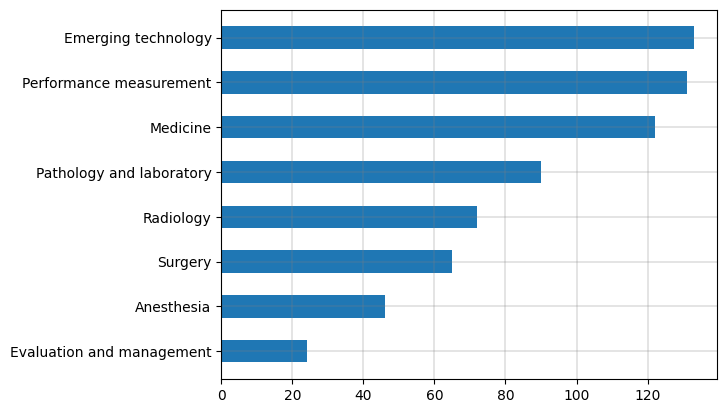

In [15]:
plt.barh(df.sectionheader,df.index, height=0.5 )
plt.grid(color='gray', linestyle='-', linewidth = 0.3)
plt.show()

In [16]:
df.subsectionheader.value_counts()

Temporary codes                    2
Other procedures                   2
Anatomic pathology (postmortem)    1
Gastroenterology                   1
Dialysis                           1
                                  ..
Upper arm and elbow                1
Shoulder and axillary              1
Lower leg (below knee)             1
Knee and popliteal area            1
Diagnostic imaging                 1
Name: subsectionheader, Length: 132, dtype: int64

In [17]:
# Vemos como queda la tabla limpia.
df.head()

,row_id,category,sectionrange,sectionheader,subsectionheader,mincodeinsubsection,maxcodeinsubsection
0,1,1,99201-99499,Evaluation and management,Office/other outpatient services,99201,99216
1,2,1,99201-99499,Evaluation and management,Hospital observation services,99217,99220
2,3,1,99201-99499,Evaluation and management,Hospital inpatient services,99221,99239
3,4,1,99201-99499,Evaluation and management,Consultations,99241,99255
4,5,1,99201-99499,Evaluation and management,Follow-up inpatient consultations (deleted codes),99261,99263


In [18]:
# Expotamos a un .csv
df.to_csv("df_d_cpt.csv", index=False)


#### Tabla D_ICD_DIAGNOSES


In [19]:
df = pd.read_csv('Data/dataset/D_ICD_DIAGNOSES.csv', encoding = 'ascii')

# Visualizamos los primeros 5 registros.
df.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [20]:
# Vemos que no hay registros nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       14567 non-null  int64 
 1   icd9_code    14567 non-null  object
 2   short_title  14567 non-null  object
 3   long_title   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [21]:
# Describimos las columna que no son numéricas. 
df.describe(exclude = 'number')

# Vemos que los titulos y el codigo 'icd9_code' son unicos. 

,icd9_code,short_title,long_title
count,14567,14567,14567
unique,14567,14328,14562
top,01716,Op skl vlt fx-concus NOS,"Longitudinal deficiency, phalanges, complete o..."
freq,1,5,2


In [22]:
# Expotamos a un .csv
df.to_csv("df_d_icd_diagnoses.csv", index=False)



#### Tabla D_ICD_PROCEDURES

In [23]:
df = pd.read_csv('Data/dataset/D_ICD_PROCEDURES.csv', encoding = 'ascii')

# Visualizamos los primeros 5 registros.
df.head()

,row_id,icd9_code,short_title,long_title
0,1,1423,Chorioret les xenon coag,Destruction of chorioretinal lesion by xenon a...
1,2,1424,Chorioret les laser coag,Destruction of chorioretinal lesion by laser p...
2,3,1425,Chorioret les p/coag NOS,Destruction of chorioretinal lesion by photoco...
3,4,1426,Chorioret les radiother,Destruction of chorioretinal lesion by radiati...
4,5,1427,Chorioret les rad implan,Destruction of chorioretinal lesion by implant...


In [24]:
# Vemos que no hay registros nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       3882 non-null   int64 
 1   icd9_code    3882 non-null   int64 
 2   short_title  3882 non-null   object
 3   long_title   3882 non-null   object
dtypes: int64(2), object(2)
memory usage: 121.4+ KB


In [25]:
# Describimos las columna que no son numéricas. 
df.describe(exclude = 'number')

# Vemos que los titulos son unicos. 

,short_title,long_title
count,3882,3882
unique,3882,3882
top,Chorioret les xenon coag,Destruction of chorioretinal lesion by xenon a...
freq,1,1


In [26]:
# Vemos los registros que tienen las columna 'icd9_code' duplicados.
df[df.icd9_code.duplicated()]

,row_id,icd9_code,short_title,long_title
189,190,34,Excis spinal cord lesion,Excision or destruction of lesion of spinal co...
248,249,31,Intraspin nerve root div,Division of intraspinal nerve root
258,259,153,Brain lobectomy,Lobectomy of brain
259,260,159,Other brain excision,Other excision or destruction of lesion or tis...
260,261,16,Excise skull lesion,Excision of lesion of skull
...,...,...,...,...
3141,3142,742,Extraperitoneal c-sect,Extraperitoneal cesarean section
3142,3143,743,Rem extratub ectop preg,Removal of extratubal ectopic pregnancy
3143,3144,744,Cesarean section NEC,Cesarean section of other specified type
3478,3479,863,Other local destruc skin,Other local excision or destruction of lesion ...


In [27]:
# Vemos que efectivamente hay registros con 'icd9_code' que se repiten. 
df[df.icd9_code == 34]

,row_id,icd9_code,short_title,long_title
160,161,34,Imageless comp asst surg,Imageless computer assisted surgery
189,190,34,Excis spinal cord lesion,Excision or destruction of lesion of spinal co...


In [28]:
# Expotamos a un .csv
df.to_csv("df_d_icd_procedures.csv", index=False)



#### Tabla D_ITEMS

In [29]:
df = pd.read_csv('Data/dataset/D_ITEMS.csv', encoding = 'ascii')

# Visualizamos los primeros 5 registros.
df.head()

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,1,1435,Sustained Nystamus,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,2,1436,Tactile Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,3,1437,Tremor,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,4,1438,Ulnar Pulse [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,5,1439,Visual Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [30]:
# Vemos la información de la tabla.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        12487 non-null  int64  
 1   itemid        12487 non-null  int64  
 2   label         12483 non-null  object 
 3   abbreviation  2992 non-null   object 
 4   dbsource      12487 non-null  object 
 5   linksto       12487 non-null  object 
 6   category      6049 non-null   object 
 7   unitname      1234 non-null   object 
 8   param_type    2992 non-null   object 
 9   conceptid     0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 975.7+ KB


Columna 'abbreviation'

In [31]:
# Vemos los registros donde no tiene la columna 'abbreviation' con nulos. 
df[~df.abbreviation.isnull()]

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
9495,12683,220507,Activated Clotting Time,ACT,metavision,chartevents,Labs,None,Numeric,NaN
9496,12684,220541,ZFibrinogen,ZFibrinogen,metavision,chartevents,Labs,None,Numeric,NaN
9497,12685,220545,Hematocrit (serum),Hematocrit (serum),metavision,chartevents,Labs,None,Numeric,NaN
9498,12686,220546,WBC,WBC,metavision,chartevents,Labs,None,Numeric,NaN
9499,12687,220560,ZProthrombin time,ZPT,metavision,chartevents,Labs,None,Numeric,NaN
...,...,...,...,...,...,...,...,...,...,...
12482,15670,228575,Incision #5- Treatment,Incision #5- Treatment,metavision,chartevents,Skin - Incisions,NaN,Text,NaN
12483,15671,228576,Incision #6- Treatment,Incision #6- Treatment,metavision,chartevents,Skin - Incisions,NaN,Text,NaN
12484,15672,228577,Impaired Skin #2- Type,Impaired Skin #2- Type,metavision,chartevents,Skin - Impairment,NaN,Text,NaN
12485,15673,228578,Impaired Skin #3- Type,Impaired Skin #3- Type,metavision,chartevents,Skin - Impairment,NaN,Text,NaN


In [32]:
# Como la abreviación no es de importancia, y tiene cerca del 75%  de datos nulos, eliminamos esta columna. 
df.drop(['abbreviation'], axis = 'columns', inplace=True)

Columna 'unitname'

In [33]:
# Vemos los registros que no tiene registros nulos en 'unitname', pero tambien nos damos cuenta que tiene gran cantidad de datos 'none'.
df[~df.unitname.isnull()]

,row_id,itemid,label,dbsource,linksto,category,unitname,param_type,conceptid
9495,12683,220507,Activated Clotting Time,metavision,chartevents,Labs,None,Numeric,NaN
9496,12684,220541,ZFibrinogen,metavision,chartevents,Labs,None,Numeric,NaN
9497,12685,220545,Hematocrit (serum),metavision,chartevents,Labs,None,Numeric,NaN
9498,12686,220546,WBC,metavision,chartevents,Labs,None,Numeric,NaN
9499,12687,220560,ZProthrombin time,metavision,chartevents,Labs,None,Numeric,NaN
...,...,...,...,...,...,...,...,...,...
12363,15551,228435,Volume instilled (MBAL),metavision,chartevents,Bronchoscopy,mL,Numeric,NaN
12364,15552,228436,Volume obtained (MBAL),metavision,chartevents,Bronchoscopy,mL,Numeric,NaN
12372,15560,228444,BIS Index Range,metavision,chartevents,Pain/Sedation,None,Numeric,NaN
12395,15583,228478,Number of Attempts (Gen Proc),metavision,chartevents,Generic Proc Note,None,Numeric,NaN


In [34]:
df.unitname.value_counts()

None                   383
mL                     366
mmHg                    83
mg                      67
dose                    61
cm                      58
%                       33
L/min                   22
cmH2O                   19
bpm                     13
units                   10
grams                    9
insp/min                 9
ml/hr                    8
?C                       8
mA                       6
sec                      6
mEq                      6
lbs                      4
mmol                     4
min                      4
mV                       4
L/min/m2                 3
mcg                      3
dynes*sec/cm5            3
kg                       3
mL SC                    3
?F                       3
ml/min                   3
mL/m2                    3
mL/beat                  2
Liters                   2
dynes.sec.cm-5/m2        2
years                    2
mEq.                     1
ml/kg                    1
g/kg                     1
m

In [35]:
# Eliminamos esta columna, ya que contiene muchos datos nulos y none. 
df.drop(['unitname'], axis = 'columns', inplace=True)


Columna 'param_type'

In [36]:
df[~df.param_type.isnull()]

,row_id,itemid,label,dbsource,linksto,category,param_type,conceptid
9495,12683,220507,Activated Clotting Time,metavision,chartevents,Labs,Numeric,NaN
9496,12684,220541,ZFibrinogen,metavision,chartevents,Labs,Numeric,NaN
9497,12685,220545,Hematocrit (serum),metavision,chartevents,Labs,Numeric,NaN
9498,12686,220546,WBC,metavision,chartevents,Labs,Numeric,NaN
9499,12687,220560,ZProthrombin time,metavision,chartevents,Labs,Numeric,NaN
...,...,...,...,...,...,...,...,...
12482,15670,228575,Incision #5- Treatment,metavision,chartevents,Skin - Incisions,Text,NaN
12483,15671,228576,Incision #6- Treatment,metavision,chartevents,Skin - Incisions,Text,NaN
12484,15672,228577,Impaired Skin #2- Type,metavision,chartevents,Skin - Impairment,Text,NaN
12485,15673,228578,Impaired Skin #3- Type,metavision,chartevents,Skin - Impairment,Text,NaN


In [37]:
df.param_type.value_counts()

Text                1309
Numeric              647
Solution             422
Checkbox             307
Date time            142
Process              125
Numeric with tag      40
Name: param_type, dtype: int64

In [38]:
# Eliminamos esta columna porque no nos brinda mucha información. Y ademas tiene una gran cantidad de datos nulos. 
df.drop(['param_type'], axis = 'columns', inplace=True)


Columna 'conceptid'

In [39]:
# Elimnamos esta columna ya que todos sus registros son nulos.
df.drop(['conceptid'], axis = 'columns', inplace=True)


Columna 'category'

In [40]:
# Vemos que hay un total de 94 categorias con la siguiente distribución. 
df.category.value_counts()

Free Form Intake            2420
ORGANISM                     312
Access Lines - Invasive      312
Skin - Impairment            271
Labs                         148
                            ... 
VBG'S                          1
Research Enrollment Note       1
NG Feeding                     1
Quick Admit                    1
Meds                           1
Name: category, Length: 94, dtype: int64

Columna 'dbsource'

In [41]:
# Vemos que solo hay 3 valores para 'dbsource'.
dbsource = df.dbsource.value_counts()
dbsource

carevue       9059
metavision    2992
hospital       436
Name: dbsource, dtype: int64

In [42]:
# Funcion auxiliar para el grafico de torta.
# No mostrara el porcentaje para menores del 3%.
def autopct(pct): 
    return ('{:.2f}%'.format(pct)) if pct > 3 else ''

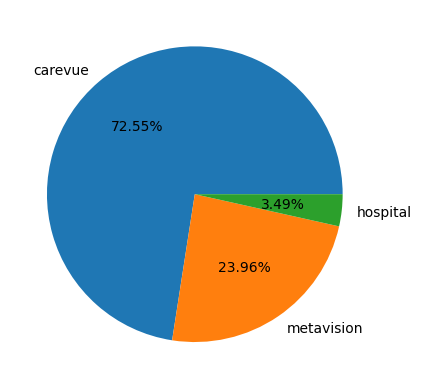

In [43]:
# Vemos como se distribuye la columna 'dbsource'.


plt.pie(dbsource.values, labels = dbsource.index, autopct=autopct)
plt.show()


Columna 'linksto'

In [44]:
linksto = df.linksto.value_counts()
linksto

chartevents           7212
inputevents_cv        2938
outputevents          1161
microbiologyevents     436
inputevents_mv         422
datetimeevents         193
procedureevents_mv     125
Name: linksto, dtype: int64

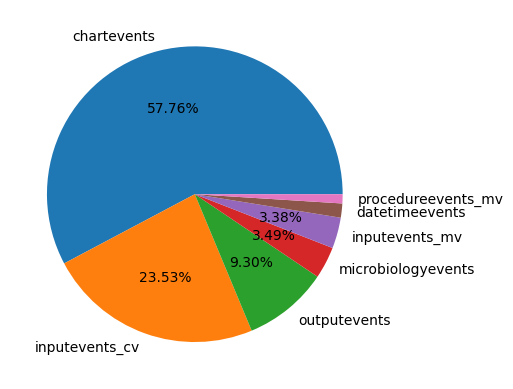

In [45]:
plt.pie(linksto.values, labels = linksto.index, autopct=autopct)
plt.show()

In [46]:
df.head()

,row_id,itemid,label,dbsource,linksto,category
0,1,1435,Sustained Nystamus,carevue,chartevents,NaN
1,2,1436,Tactile Disturbances,carevue,chartevents,NaN
2,3,1437,Tremor,carevue,chartevents,NaN
3,4,1438,Ulnar Pulse [Right],carevue,chartevents,NaN
4,5,1439,Visual Disturbances,carevue,chartevents,NaN


In [47]:
# Expotamos a un .csv
df.to_csv("df_d_items.csv", index=False)



#### Tabla D_LABITEMS


In [48]:
df = pd.read_csv('Data/dataset/D_LABITEMS.csv', encoding = 'ascii')

# Visualizamos los primeros 5 registros.
df.head()

,row_id,itemid,label,fluid,category,loinc_code
0,1,50800,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
1,2,50801,Alveolar-arterial Gradient,Blood,Blood Gas,19991-9
2,3,50802,Base Excess,Blood,Blood Gas,11555-0
3,4,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas,1959-6
4,5,50804,Calculated Total CO2,Blood,Blood Gas,34728-6


In [49]:
# Mostramos la informacion de la tabla.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      753 non-null    int64 
 1   itemid      753 non-null    int64 
 2   label       753 non-null    object
 3   fluid       753 non-null    object
 4   category    753 non-null    object
 5   loinc_code  585 non-null    object
dtypes: int64(2), object(4)
memory usage: 35.4+ KB


Columna 'fluid'

In [50]:
# Vemos que hay 16 valores posibles para la columna 'fluid'.  
fluid = df.fluid.value_counts()
fluid

Blood                        359
Urine                        103
Other Body Fluid              82
Bone Marrow                   40
Ascites                       37
Pleural                       35
Cerebrospinal Fluid (CSF)     30
Joint Fluid                   26
BLOOD                         15
OTHER BODY FLUID               9
Stool                          6
URINE                          6
JOINT FLUID                    2
CSF                            1
ASCITES                        1
STOOL                          1
Name: fluid, dtype: int64

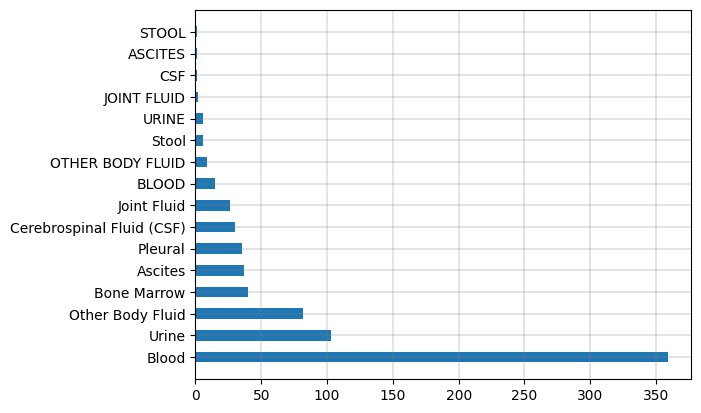

In [51]:
# Vemos la distribución de la columan 'fluid'
plt.barh(fluid.index,fluid.values, height=0.5 )
plt.grid(color='gray', linestyle='-', linewidth = 0.3)
plt.show()

Columna 'category'

In [52]:
category = df.category.value_counts()
category

Hematology    410
Chemistry     274
Blood Gas      34
CHEMISTRY      19
HEMATOLOGY     13
BLOOD GAS       3
Name: category, dtype: int64

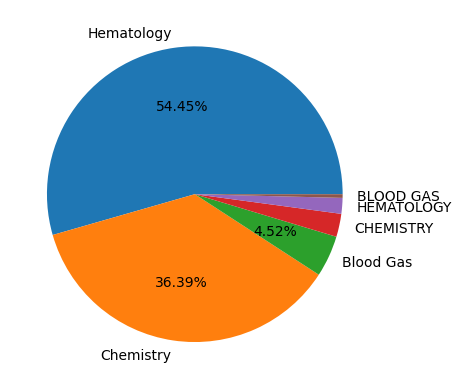

In [53]:
plt.pie(category.values, labels = category.index, autopct=autopct)
plt.show()

In [54]:
# Expotamos a un .csv
df.to_csv("df_d_labitems.csv", index=False)



#### Tabla TRANSFERS


In [55]:
df = pd.read_csv('Data/dataset/TRANSFERS.csv', encoding = 'ascii')

# Visualizamos los primeros 5 registros.
df.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,intime,outtime,los
0,54440,10006,142345,206504.0,carevue,admit,NaN,MICU,NaN,52.0,2164-10-23 21:10:15,2164-10-25 12:21:07,39.18
1,54441,10006,142345,NaN,carevue,transfer,MICU,NaN,52.0,45.0,2164-10-25 12:21:07,2164-11-01 17:14:27,172.89
2,54442,10006,142345,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2164-11-01 17:14:27,NaN,NaN
3,54460,10011,105331,232110.0,carevue,admit,NaN,MICU,NaN,15.0,2126-08-14 22:34:00,2126-08-28 18:59:00,332.42
4,54461,10011,105331,NaN,carevue,discharge,MICU,NaN,15.0,NaN,2126-08-28 18:59:00,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         524 non-null    int64  
 1   subject_id     524 non-null    int64  
 2   hadm_id        524 non-null    int64  
 3   icustay_id     167 non-null    float64
 4   dbsource       524 non-null    object 
 5   eventtype      524 non-null    object 
 6   prev_careunit  167 non-null    object 
 7   curr_careunit  167 non-null    object 
 8   prev_wardid    395 non-null    float64
 9   curr_wardid    395 non-null    float64
 10  intime         524 non-null    object 
 11  outtime        395 non-null    object 
 12  los            395 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 53.3+ KB


In [57]:
# Vemos la distribución de la tabla 'dbsource'
df.dbsource.value_counts()

metavision    287
carevue       237
Name: dbsource, dtype: int64

In [58]:
# Vemos la distribución de la tabla 'eventtype'
df.eventtype.value_counts()



transfer     266
admit        129
discharge    129
Name: eventtype, dtype: int64

In [59]:
# Vemos la distribución de la tabla 'prev_careunit'
df.prev_careunit.value_counts()




MICU     95
SICU     27
CCU      26
TSICU    12
CSRU      7
Name: prev_careunit, dtype: int64

In [60]:
# Vemos la distribución de la tabla 'curr_careunit'
df.curr_careunit.value_counts()




MICU     95
SICU     27
CCU      26
TSICU    12
CSRU      7
Name: curr_careunit, dtype: int64

In [61]:
# Expotamos a un .csv
df.to_csv("df_transfers.csv", index=False)



#### Tabla PATIENTS


In [62]:
df = pd.read_csv('Data/dataset/PATIENTS.csv', encoding = 'ascii')


# Visualizamos los primeros 5 registros.
df.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [64]:
# Vemos la distribucion de 'gender'
df.gender.value_counts()


F    55
M    45
Name: gender, dtype: int64

In [65]:
# Vemos que indica que todos los pacientes de esta tabla fallecieron. 
df.expire_flag.value_counts()

1    100
Name: expire_flag, dtype: int64

In [66]:
# Expotamos a un .csv
df.to_csv("df_patients.csv", index=False)



#### Tabla PRESCRIPTIONS


In [67]:
df = pd.read_csv('Data/dataset/PRESCRIPTIONS.csv', encoding = 'ascii')


# Visualizamos los primeros 5 registros.
df.head()

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6494300.0,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,536338101.0,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,574705050.0,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,904516561.0,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,121054410.0,100mg UD Cup,100,mg,1,UDCUP,PO


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             10398 non-null  int64  
 1   subject_id         10398 non-null  int64  
 2   hadm_id            10398 non-null  int64  
 3   icustay_id         7046 non-null   float64
 4   startdate          10398 non-null  object 
 5   enddate            10397 non-null  object 
 6   drug_type          10398 non-null  object 
 7   drug               10398 non-null  object 
 8   drug_name_poe      5766 non-null   object 
 9   drug_name_generic  5772 non-null   object 
 10  formulary_drug_cd  10397 non-null  object 
 11  gsn                9122 non-null   float64
 12  ndc                10397 non-null  float64
 13  prod_strength      10398 non-null  object 
 14  dose_val_rx        10398 non-null  object 
 15  dose_unit_rx       10398 non-null  object 
 16  form_val_disp      103

In [69]:
# Vemos la distribución de la columna 'drug_type' 
df.drug_type.value_counts()




MAIN        7709
BASE        2617
ADDITIVE      72
Name: drug_type, dtype: int64

In [70]:
# Expotamos a un .csv
df.to_csv("df_prescriptions.csv", index=False)





#### Tabla SERVICES

In [71]:
df = pd.read_csv('Data/dataset/SERVICES.csv', encoding = 'ascii')


# Visualizamos los primeros 5 registros.
df.head()

,row_id,subject_id,hadm_id,transfertime,prev_service,curr_service
0,14974,10006,142345,2164-10-23 21:10:15,NaN,MED
1,14979,10011,105331,2126-08-14 22:34:00,NaN,MED
2,14981,10013,165520,2125-10-04 23:38:00,NaN,MED
3,14985,10017,199207,2149-05-26 17:21:09,NaN,MED
4,14986,10019,177759,2163-05-14 20:43:56,NaN,MED


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   row_id        163 non-null    int64 
 1   subject_id    163 non-null    int64 
 2   hadm_id       163 non-null    int64 
 3   transfertime  163 non-null    object
 4   prev_service  34 non-null     object
 5   curr_service  163 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.8+ KB


In [73]:
df.prev_service.value_counts()

MED      14
OMED      8
CMED      3
NSURG     2
TSURG     2
CSURG     2
VSURG     1
SURG      1
NMED      1
Name: prev_service, dtype: int64

In [74]:
df.curr_service.value_counts()



MED      87
OMED     16
SURG     15
CMED     14
NMED      6
CSURG     6
TSURG     6
NSURG     5
TRAUM     4
VSURG     2
ORTHO     1
GU        1
Name: curr_service, dtype: int64

In [75]:
# Expotamos a un .csv
df.to_csv("df_services.csv", index=False)